## Import Dependencies

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load dataset
df = pd.read_csv("train.csv")

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
# check the shape of the dataset
df.shape

(2000, 21)

In [4]:
# Check the basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**There isn't any Null values and Categorical Columns in our dataset.**

In [5]:
# check basic statical info of our dataset
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
# Now, Let's Look for Duplicated Values in Our dataset
df.duplicated().sum()

0

## Data Preprocessing

In [7]:
# Ram Column's Values are in Mega Bytes. So, we will Convert it into Giga Bytes
df['ram'] = np.round(df['ram'] / 1000)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,3.0,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,3.0,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,3.0,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,3.0,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1.0,8,2,15,1,1,0,1


In [8]:
# Let's Convert Every Height and Weight in Inches from Cm
ls = ['px_height','px_width','sc_h','sc_w']

df[ls] = df[ls].apply(lambda x:np.round(x/2.54,2))

In [9]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,7.87,297.64,3.0,3.54,2.76,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,356.30,782.68,3.0,6.69,1.18,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,497.24,675.59,3.0,4.33,0.79,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,478.74,703.15,3.0,6.30,3.15,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,475.59,477.17,1.0,3.15,0.79,15,1,1,0,1


## Exploratory Data Analysis

<AxesSubplot:xlabel='price_range', ylabel='count'>

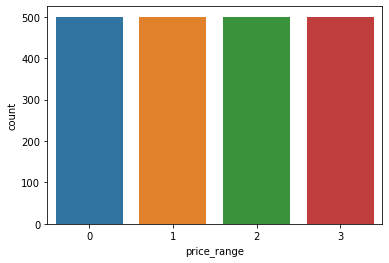

In [10]:
# Let's Checl Our Dataset is Balanced or not
sns.countplot(x='price_range',data=df)

Our Dataset is Completely Balanced

<AxesSubplot:xlabel='price_range', ylabel='count'>

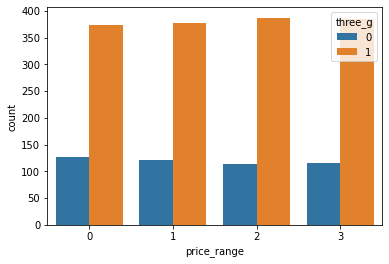

In [11]:
# Three G Phone Counts as per Price Range
sns.countplot(hue='three_g',x='price_range',data=df)

<AxesSubplot:xlabel='price_range', ylabel='talk_time'>

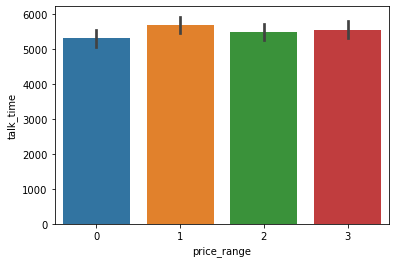

In [12]:
# Talk time as per Price Range
sns.barplot(x='price_range',y='talk_time',data=df,estimator=np.sum)

<AxesSubplot:xlabel='px_width', ylabel='px_height'>

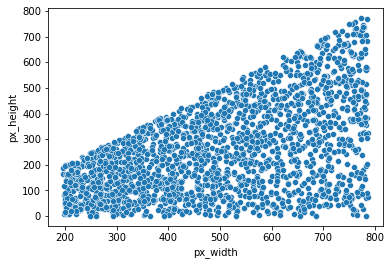

In [13]:
# Relationship Between Px Height and Px Width
sns.scatterplot(y='px_height',x='px_width',data=df)

<AxesSubplot:xlabel='sc_w', ylabel='sc_h'>

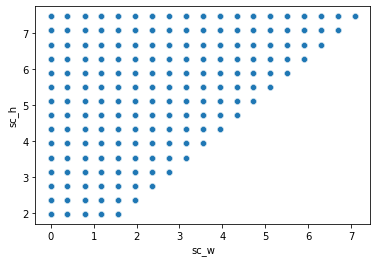

In [14]:
# Relationship Between Screen Height and Screen Width
sns.scatterplot(y='sc_h',x='sc_w',data=df)

## Find Best Model for Prediction

In [15]:
# Now Let's Extract Our X and y
X = df.drop('price_range',axis=1)
y = df['price_range']

In [16]:
# Using Recursive Features Eliminations Method for Feature Selection
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# define the method
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit the model
rfe.fit(X, y)
# DataFrame of Important Features
imp_features_df = pd.DataFrame({'Feature':X.columns,'Importance':rfe.support_,'ranking':rfe.ranking_})
# Extract Important Columns Names from DataFrame 
imp_features = imp_features_df[imp_features_df['Importance']==True]['Feature'].values
# Final DataFrame With Reduced Features
X = df[imp_features]

In [17]:
# Let's Do train test split
from sklearn.model_selection import cross_val_score,train_test_split,ShuffleSplit,GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42,stratify=y)

In [18]:
# Let's Check the shape of the data
X_train.shape,X_test.shape

((1800, 5), (200, 5))

In [19]:
# Let's Scale our Dataset
from sklearn.preprocessing import StandardScaler,MinMaxScaler

std = StandardScaler()

X_trf = std.fit_transform(X)
X_train_trf = std.transform(X_train)
X_test_trf = std.transform(X_test)

In [20]:
# import required Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [21]:
model_list = [('lg',LogisticRegression(solver='liblinear')),('dt',DecisionTreeClassifier()),('rf',RandomForestClassifier()),
              ('adb',AdaBoostClassifier()),('knn',KNeighborsClassifier()),('svm',SVC())]

for model_name,model in model_list:
  model.fit(X_train_trf,y_train)
  pred = model.predict(X_test_trf)
  print("{} -> {}".format(model_name,model.score(X_test_trf,y_test)))

lg -> 0.745
dt -> 0.74
rf -> 0.77
adb -> 0.67
knn -> 0.76
svm -> 0.775


In [22]:
# Function for Find Best Model and Parameters of that Model.
algos = {
    'svm':{
        'model':SVC(),
        'params':{
            'C':[0.1,10,5,3,50,100]
        }
    },

    'knn':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[1,3,5,7]
        }
    },

    'rf':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[50,100,200,300],
            'criterion':['gini','entropy'],
            'min_samples_split':range(2,10,2),
            'max_depth':[10,20,30,40,50],
            'max_samples':[0.25,0.50,0.75]
        }
    },

    'lg':{
        'model':LogisticRegression(solver='liblinear'),
        'params':{
            'C':[0.1,1,0.5,0.01,10,5]
        }
    }
    
}

score = []

cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=42)

for model_name,config in algos.items():
  gd = GridSearchCV(config['model'],config['params'],scoring='accuracy',return_train_score=False,cv=cv)
  gd.fit(X_trf,y)
  score.append({'model_name':model_name,'best_score':gd.best_score_,'best_params':gd.best_params_})

pd.DataFrame(score)

,model_name,best_score,best_params
0,svm,0.78650,{'C': 3}
1,knn,0.76150,{'n_neighbors': 5}
2,rf,0.78400,"{'criterion': 'entropy', 'max_depth': 40, 'max..."
3,lg,0.72875,{'C': 10}


###### We can Clearly See that SVM is Giving us Best Performance on this Dataset. So, We are Going to use SVM for Prediction.

## Model Building

In [23]:
# Create Object of Model
model = SVC(C=3,kernel='rbf')

# Training of Model
model.fit(X_train_trf,y_train)

SVC(C=3)

## Model Evaluation

In [24]:
# import Required Libraries for Model Evaluation
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# Function for Scorecard of Training and Testing data
def scorecard(model,X_train,X_test,y_train,y_test):
  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  train_score = pd.Series({'acc_score':accuracy_score(y_train,train_pred),'pre_score':precision_score(y_train,train_pred,average='macro'),
                           'rec_score':recall_score(y_train,train_pred,average='macro'),'f1_score':f1_score(y_train,train_pred,average='macro')})

  test_score = pd.Series({'acc_score':accuracy_score(y_test,test_pred),'pre_score':precision_score(y_test,test_pred,average='macro'),
                           'rec_score':recall_score(y_test,test_pred,average='macro'),'f1_score':f1_score(y_test,test_pred,average='macro')})

  scorecard = pd.concat([train_score,test_score],axis=1)

  scorecard.columns = ['Train_score','Test_score']

  return scorecard


In [25]:
# Scorecard of Training and Test data
scorecard(model,X_train_trf,X_test_trf,y_train,y_test)

,Train_score,Test_score
acc_score,0.822778,0.790000
pre_score,0.824361,0.790076
rec_score,0.822778,0.790000
f1_score,0.822916,0.788697


In [26]:
# Cross Validation Score 
cross_val_score(model,X_trf,y,cv=cv,scoring='accuracy')

array([0.77  , 0.7775, 0.8   , 0.7725, 0.7925, 0.7925, 0.785 , 0.7675,
       0.8075, 0.8   ])